In [0]:
# permitimos el acceso a nuestro drive para poder leer el archivo dow.txt
from google.colab import drive  
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## **Ejercicio 7.4**

In [0]:
# Importamos las librerias necesarias
from numpy import loadtxt             # nos permite importar los datos el archivos               
from pylab import  xlim, grid 
import matplotlib.pyplot as plt       # nos permite graficar los datos
from matplotlib.pyplot import legend
from numpy.fft import rfft, irfft  # de la extension numpy.fft importamos la funciones rfft  e irfft que nos permiten hacer uso de las transformada rapida de Fourier real y su respectiva transformada inversa

**a)**
Primero importamos los datos de los valores promedio de cada dia de negocion de la bolsa de valores de USA desde 2006 a 2010 y los graficamos



numero de datos:  1024


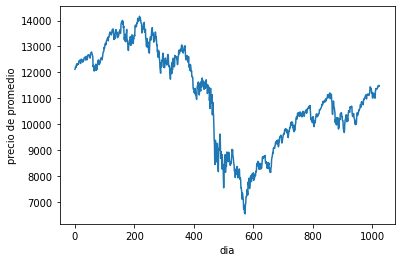

In [0]:
data= loadtxt("drive/My Drive/parcial/fc1-exa-prmcort2020i-alda1896/dow.txt")  # importa los datos del archivo dwt.txt en un array unidimensional
print ('numero de datos: ', len(data)) # Imprimimos el tamaño del array para observar cuantos datos tenemos
plt.plot (data)
plt.xlabel('dia')
plt.ylabel('precio de promedio')
plt.show()

**b)**
Ahora calculamos los coeficientes de la transformada de Fourier discreta de los datos usando la función rfft y la graficaremos

In [0]:
transformada=rfft(data) # rfft realiza la tranformada a los datos y los guardamos en un array  que llamamos transformada
print (len (transformada)) # imprimimos el tamaño del array transformada 

513


Como vemos el número de datos del array transformada, los cuales representan los coeficientes de Fourier son solo 513 es decir hay N/2+1 coeficientes aunque debería haber N (igual a el número de puntos). Esto se debe a que como los datos de entrada son números reales y N es par a partir de N/2+1los coeficientes de Fourier son el complejo conjugando  de estos. El algoritmo de python están diseñado para saber esto y por ello solo almacena estos primeros coeficientes.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


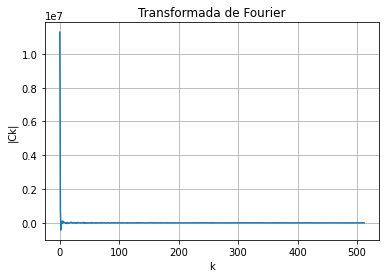

In [0]:
plt.plot(transformada)
plt.xlabel('k')
plt.ylabel('|Ck|')
plt.title("Transformada de Fourier")
grid()

Sabemos que al graficar la transformada obtenemos un histograma que nos da informacion sobre las frecuencias que posee una señal. En eje X tenemos a k y este valor es proporcional a la frecuencia en un factor N donde N es el número de datos.

\begin{equation}
f=\frac{k}{N}
\end{equation}

 En el eje Y tenemos el valor absoluto de los coeficientes de Fourier Ck  que nos idican la cantidad de veces que una frecuencia aparece, es decir nos dice cual es la frecuencia dominante. 
 como vemos en la  gráfica las frecuencias dominantes en estos datos son las frecuencias bajas.

**c)**
Ahora haremos que todos los elementos del array transformada  se vuelvan cero, excepto el  primer 10% 

In [0]:
transformada2=[]    # Array vacío en el que guardaremos los nuevos datos
posdiez=0.1*len(transformada) #hallamos la posicion en el array "transformada" equivalente al 10% de sus datos
for i in range (len(transformada)):  # con el ciclo for llenaremos el array "transformada2" 
  if i < (posdiez):  
    transformada2.append(transformada[i])   # si la posicion i en "transformada2" es menor que posdiez los datos en este array  son iguales a los datos en "transformada"
  else:                                     # cuando la posicion i i mayor a posdiez todos lo datos restantes en "transformada2" seran ceros
    transformada2.append(0)
  

**d)**
Seguidamente se calcula la transformada inversa de Fourier del arreglo “transformada2” con  ceros y todo, utilizando la función irfft, y se superpone con en el gráfico de los datos originales

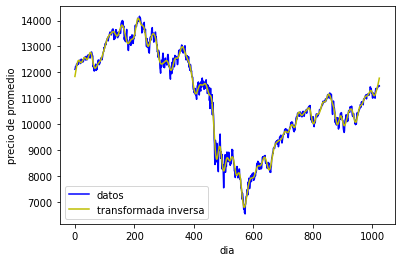

In [0]:
plt.plot(data,"b" ,label='datos') # Se superponen la curva de los datos originales con los de la tranformada inversa
plt.plot(irfft(transformada2), "y",label='transformada inversa') # la funcion irfft se aplica al array transformada dos y  luego se grafica con la función plot
plt.xlabel('dia')
plt.ylabel('precio de promedio')
legend(loc='lower left')
plt.show()

Como se puede observar las gráficas no son muy diferentes, sin embargo, sí se puede notar que la  curva de la transformada inversa es más suave que la curva de los datos originales, lo cual se debe al hecho de que se han eliminado las frecuencias más altas al haber hecho cero el 90% los últimos coeficientes de Fourier.

**d)**
Ahora realizaremos un proceso análogo al del punto c pero esta vez solo nos quedaremos con el 2%  de los datos del array transformada que como ya mencionamos son los coeficientes de Fourier



In [0]:
transformada3=[]   
posdos=0.02*len(transformada) 
for i in range (len(transformada)): 
  if i < (posdos):  
    transformada3.append(transformada[i])   
  else:                                    
    transformada3.append(0)

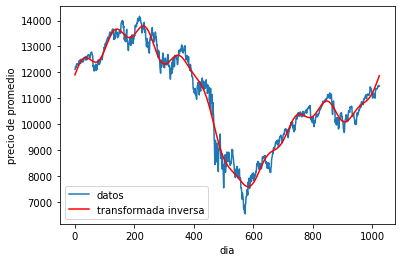

In [0]:
plt.plot(data, label='datos')
plt.plot(irfft(transformada3), "r", label='transformada inversa') 
plt.xlabel('dia')
plt.ylabel('precio de promedio')
legend(loc='lower left')
plt.show()

Ahora se han eliminado más frecuencias  altas y por lo tanto la curva de la transformada inversa se hace aún más suave, por lo tanto  tenemos una gráfica que nos da información en el dominio del tiempo de los datos  con un periodo más definido.
 ya que como notamos en principio las frecuencia dominante en esta señal era una frecuencia baja.

## **Ejercicio 7.5**



Para empezar  escribiremos un código que cree una array de 1000 elementos que contengan mil muestras igualmente espaciadas que representan un solo ciclo de una onda cuadrada teniendo encuenta su definicion:

\begin{equation}
f\left( t \right )=\left\{\begin{matrix}
1\quad si \ \left \lfloor 2t \right \rfloor \ es \ par \\ -1\quad si \ \left \lfloor 2t \right \rfloor \ es \ impar
\end{matrix}\right.
\end{equation}

In [0]:
from numpy import linspace,zeros
import numpy as np 
import math as mt      # importamos el moduto math para usar la funcion modf

In [0]:
puntos=linspace(0,1,1000) # creamos  de mil puntos con la funcion linspace para luego aplicar la funcion cuadrado a estos puntos
# creamos un array vacio que luego se llenara con las muestras de la funcion onda cuadrada

def onda_cuadrada (t):            #creamos una funcion que represente una onda cuadrada que tiene como paratmetro de entrada los valores de t
                   
  dec,ent=mt.modf(2*t)        # la funcion modf retona la parte entera y la parte decimal de un numero nosotros solo necesitamos la parte entera del numero
  if ent%2 ==0:               # el condicional if pregunta si la parte entera de dos veces t es un numero par, para estos usamos la funcion "%" que nos da el resto de la divicion, así si 2*í es par el resto sera cero
    return 1      # si el numero es par la funcion onda cuadrada sera 1
  else:
    return -1     # de otro modo el numero sera impar y su la funcion cuadrado sera -1


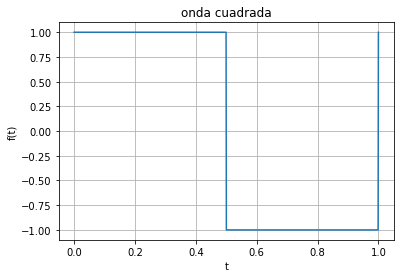

In [0]:
muestras = np.array(list(map(onda_cuadrada, puntos)), float) # creamos un arreglo usando la funcióm "map" que nos permite aplicar la fucion que creamos "onda_cuadrada" sobre la lista "puntos" y guardamos estos datos en un array
plt.plot(puntos, muestras)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('onda cuadrada')
grid()
plt.show()

Vamos a  suavizar esta función para eso primero debemos calcular la transformada discreta de Fourier haciendo uso de la función rfft

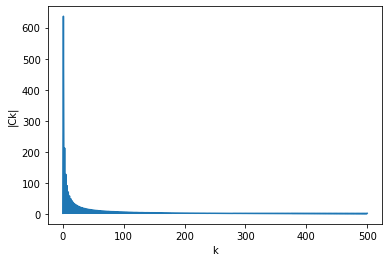

In [0]:
Trans_cuadrado=rfft(muestras)
plt.plot(abs(Trans_cuadrado))
plt.xlabel('k')
plt.ylabel('|Ck|')
plt.show()

Como observamos gracias a la transformada, también en esta señal las bajas frecuencias son dominantes, así que dejaremos solo los 10 primeroa coeficientes de Fourier y haremos los demás cero, luego haremos la transformada inversa a estos coeficientes y observaremos como queda grafica comparada con la señal original

In [0]:
Tdiez = []                         #array en el que guardarmos los primeros diez coeficientes de Fouirier
for i in range (len(transformada)):  
  if i < 10:
    Tdiez.append(Trans_cuadrado[i])   
  else:                                     
    Tdiez.append(0)

Cuadrado_inverso = irfft(Tdiez)

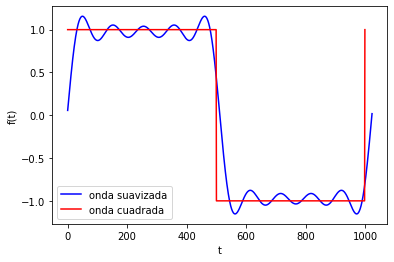

In [0]:
plt.plot(Cuadrado_inverso,"b",label='onda suavizada')
plt.plot(muestras,"r" ,label= 'onda cuadrada')
plt.xlabel('t')
plt.ylabel('f(t)')
legend(loc='lower left')
plt.show()

Lo que podemos encontrar es que la señal no se suaviza simplemente ahora se observa que hay picos y fluctuaciones más marcadas. Esto se debe a que  Como sabemos una función periódica puede expresarse a una suma infinita de funciones armónicas senos y cosenos  mediante las serie de Fourier sin embargo acá no tenemos una funcion continua sino una señal discreta, en este caso él pulso de onda cuadrado es una suma de funciones armónicas cada una multiplicada por un coeficiente de Fourier. Debido a que intentamos suavizar la función eliminando gran cantidad de los coeficientes  también eliminamos gran cantidad de valores en la suma de armónicos lo cual implica que al obtener los datos inversos tenemos una serie de Fourier mucho menos aproximada a la función orinal y por la tanto se observan la suma armonicos con más picos en lugar de la función suave que esperábamos obtener.